<a href="https://colab.research.google.com/github/Kiran-Venkatesh/KV/blob/master/Credit_Card_Lead_Prediction_Analytics_Vindhya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Analytics_Vindhya/train_s3TEQDk.csv")
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [ ]:
print(df.shape)
df.columns

(245725, 11)


Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

**Data Exploration**

In [ ]:
df.Is_Lead.value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

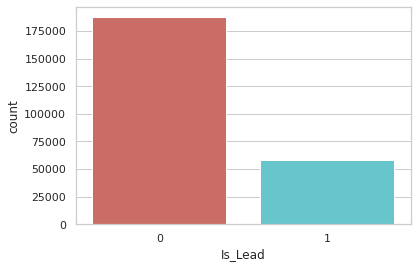

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.countplot(x='Is_Lead',data=df,palette='hls')
plt.show()
plt.savefig('count_plot')

In [ ]:
cc_not_interested = len(df[df['Is_Lead']==0])
cc_interested = len(df[df['Is_Lead']==1])
pct_of_ccni = cc_not_interested/(cc_not_interested+cc_interested)
print("percentage of Credit Card Not Interested is", pct_of_ccni*100)
pct_of_cci = cc_interested/(cc_not_interested+cc_interested)
print("percentage of Credit Card Interested", pct_of_cci*100)
#From this Data is imbalanced

percentage of Credit Card Not Interested is 76.27917387323228
percentage of Credit Card Interested 23.720826126767726


In [ ]:
df.groupby('Is_Lead').mean()

,Age,Vintage,Avg_Account_Balance
Is_Lead,,,
0,41.947662,41.913923,1.103018e+06
1,49.993944,63.183074,1.210034e+06


In [ ]:
df.groupby('Gender').mean()

,Age,Vintage,Avg_Account_Balance,Is_Lead
Gender,,,,
Female,41.382639,41.764257,1.107373e+06,0.203581
Male,45.912114,51.276489,1.145881e+06,0.265155


In [ ]:
df.groupby('Is_Active').mean()

,Age,Vintage,Avg_Account_Balance,Is_Lead
Is_Active,,,,
No,41.271209,41.561674,1.076315e+06,0.208151
Yes,47.927291,55.459014,1.210431e+06,0.282967


In [ ]:
df.groupby('Credit_Product').mean()

,Age,Vintage,Avg_Account_Balance,Is_Lead
Credit_Product,,,,
No,40.791600,40.567641,1.078018e+06,0.073588
Yes,46.846328,51.735269,1.189363e+06,0.314951


In [ ]:
df.groupby('Channel_Code').mean()

,Age,Vintage,Avg_Account_Balance,Is_Lead
Channel_Code,,,,
X1,32.324707,25.311576,1.030418e+06,0.091421
X2,50.422880,54.560804,1.142457e+06,0.327895
X3,54.717429,74.939443,1.274756e+06,0.367025
X4,44.757228,12.451966,9.766356e+05,0.247800


In [ ]:
df.groupby('Occupation').mean()

,Age,Vintage,Avg_Account_Balance,Is_Lead
Occupation,,,,
Entrepreneur,47.833521,69.664792,1.415043e+06,0.660667
Other,53.116797,54.924729,1.209870e+06,0.244952
Salaried,30.882901,26.348838,1.033420e+06,0.159669
Self_Employed,46.568563,55.527189,1.131946e+06,0.275965


In [ ]:
df.groupby('Region_Code').mean()

,Age,Vintage,Avg_Account_Balance,Is_Lead
Region_Code,,,,
RG250,37.925481,35.080128,7.357640e+05,0.157452
RG251,43.706891,41.801681,7.416780e+05,0.232101
RG252,35.689454,32.570229,6.347707e+05,0.138124
RG253,46.547363,48.790097,1.374248e+06,0.258881
RG254,43.655253,47.223472,1.407392e+06,0.212854
RG255,42.609019,42.369673,8.682497e+05,0.232408
RG256,36.097295,32.263084,6.748068e+05,0.140850
RG257,39.274381,37.987707,8.581055e+05,0.191772
RG258,41.188109,38.498719,7.050050e+05,0.220400


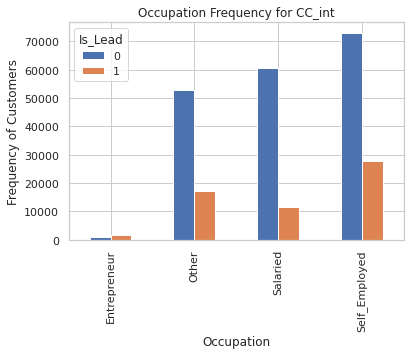

In [ ]:
%matplotlib inline
pd.crosstab(df.Occupation,df.Is_Lead).plot(kind='bar')
plt.title('Occupation Frequency for CC_int')
plt.xlabel('Occupation')
plt.ylabel('Frequency of Customers')
plt.savefig('Occupation_CC')
#Occupation as a good predictor

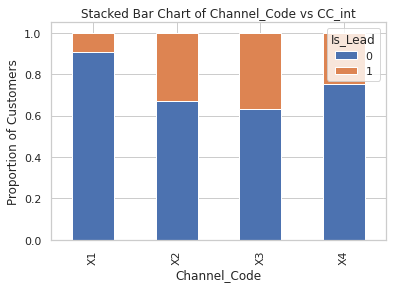

In [ ]:
table=pd.crosstab(df.Channel_Code,df.Is_Lead)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Channel_Code vs CC_int')
plt.xlabel('Channel_Code')
plt.ylabel('Proportion of Customers')
plt.savefig('Channel_Code_CC_int')
#Channel_Code as a good predictor

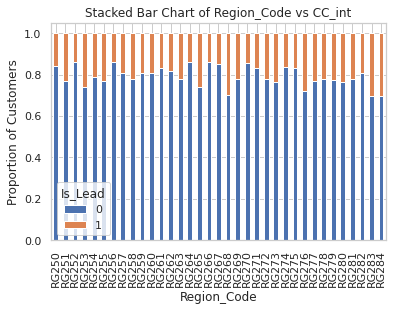

In [ ]:
table=pd.crosstab(df.Region_Code,df.Is_Lead)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Region_Code vs CC_int')
plt.xlabel('Region_Code')
plt.ylabel('Proportion of Customers')
plt.savefig('Region_Code_CC_int')
#Region_Code is a weak predictor

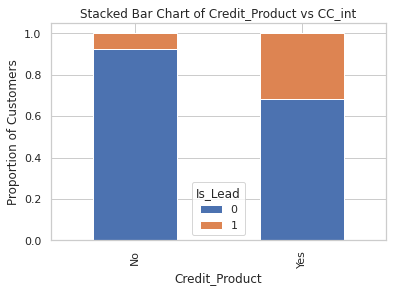

In [ ]:
table=pd.crosstab(df.Credit_Product,df.Is_Lead)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Credit_Product vs CC_int')
plt.xlabel('Credit_Product')
plt.ylabel('Proportion of Customers')
plt.savefig('Credit_Product_CC_int')
#Credit_Product is a good predictor

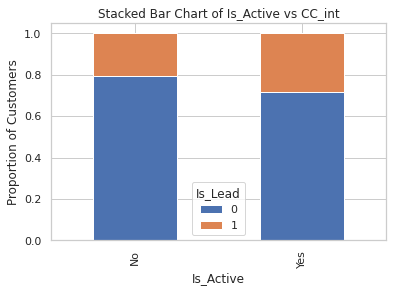

In [ ]:
table=pd.crosstab(df.Is_Active,df.Is_Lead)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Is_Active vs CC_int')
plt.xlabel('Is_Active')
plt.ylabel('Proportion of Customers')
plt.savefig('Is_Active_CC_int')
#Is_Active is a medium predictor

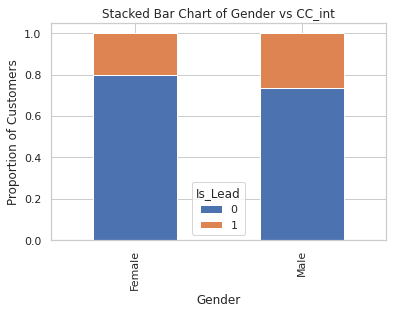

In [ ]:
table=pd.crosstab(df.Gender,df.Is_Lead)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Gender vs CC_int')
plt.xlabel('Gender')
plt.ylabel('Proportion of Customers')
plt.savefig('Gender_CC_int')
#Gender is a medium predictor

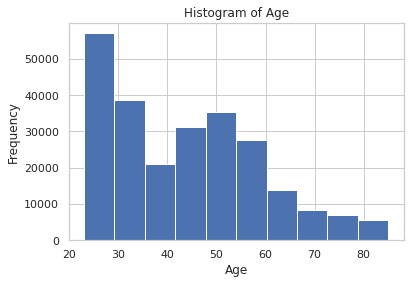

In [ ]:
df.Age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')
#20-30 age people are more visiting bank

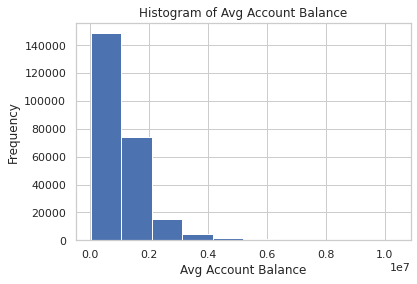

In [ ]:
df.Avg_Account_Balance.hist()
plt.title('Histogram of Avg Account Balance')
plt.xlabel('Avg Account Balance')
plt.ylabel('Frequency')
plt.savefig('hist_Avg Account Balance')

**Creating Dummy Variables**

In [ ]:
#dummy variables has only two values, zero and one
#Selecting Good & Medium predictors for a dummy variables creation
def dummify(data):
  category=['Occupation','Channel_Code','Credit_Product','Is_Active','Gender']
  for var in category:
      cat_list='var'+'_'+var
      cat_list = pd.get_dummies(data[var], prefix=var)
      data1=data.join(cat_list)
      data=data1
  data_vars=data.columns.values.tolist()
  to_keep=[i for i in data_vars if i not in category]
  data_final=data[to_keep]
  return data_final

In [ ]:
data_final=dummify(df)

In [ ]:
data_final.columns.values

array(['ID', 'Age', 'Region_Code', 'Vintage', 'Avg_Account_Balance',
       'Is_Lead', 'Occupation_Entrepreneur', 'Occupation_Other',
       'Occupation_Salaried', 'Occupation_Self_Employed',
       'Channel_Code_X1', 'Channel_Code_X2', 'Channel_Code_X3',
       'Channel_Code_X4', 'Credit_Product_No', 'Credit_Product_Yes',
       'Is_Active_No', 'Is_Active_Yes', 'Gender_Female', 'Gender_Male'],
      dtype=object)

In [ ]:
data_final=data_final.drop(['ID','Region_Code'],axis = 1)

In [ ]:
data_final.head()

,Age,Vintage,Avg_Account_Balance,Is_Lead,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Is_Active_No,Is_Active_Yes,Gender_Female,Gender_Male
0,73,43,1045696,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0
1,30,32,581988,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
2,56,26,1484315,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0
3,34,19,470454,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1
4,30,33,886787,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0


**Minority Over Sampling Using SMOTE & Standard Scaling**

In [ ]:
import pickle

def scale_data(X_train,X_test):
    """
    Input: Features (numpy arrays)
    Output: Scaled data
    """
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    pickle.dump(scaler, open('scaler_full.pkl','wb'))


    return X_train_scaled, X_test_scaled
  
 

In [ ]:
X = data_final.loc[:, data_final.columns != 'Is_Lead']
Y = data_final.loc[:, data_final.columns == 'Is_Lead']
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
sm_X,sm_Y=sm.fit_sample(X, Y)
#sm_X,sm_Y=sm.fit_sample(X_train, Y_train)
sm_X = pd.DataFrame(data=sm_X,columns=X.columns )
sm_Y= pd.DataFrame(data=sm_Y,columns=['Is_Lead'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(sm_X))
print("Number of CC_not_interested in oversampled data",len(sm_Y[sm_Y['Is_Lead']==0]))
print("Number of CC_interested",len(sm_Y[sm_Y['Is_Lead']==1]))
print("Proportion of CC_not_interested in oversampled data is ",len(sm_Y[sm_Y['Is_Lead']==0])/len(sm_X))
print("Proportion of CC_interested in oversampled data is ",len(sm_Y[sm_Y['Is_Lead']==1])/len(sm_X))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


length of oversampled data is  374874
Number of CC_not_interested in oversampled data 187437
Number of CC_interested 187437
Proportion of CC_not_interested in oversampled data is  0.5
Proportion of CC_interested in oversampled data is  0.5


In [ ]:
from sklearn.preprocessing import StandardScaler
X_train_scaled,X_test_scaled = scale_data(sm_X, X_test)
#X_scaled=scale_data(sm_X)

In [ ]:
mlp_final = MLPClassifier(random_state=1, max_iter=500)
mlp_final.fit(X_scaled,sm_Y.values.ravel())
                       
pickle.dump(mlp_final, open('mlp_full_final.pkl','wb'))




In [ ]:
from sklearn.metrics import classification_report,roc_auc_score
def model_score(model_name, model, X_train_scaled,X_test_scaled, y_train, y_test):
    
    print('Calculating validation score...')

    my_model = model
    my_model.fit(X_train_scaled,y_train)
    
    print(f'{model_name} accuracy score: {my_model.score(X_test_scaled,y_test):.4}\n')
    y_pred = my_model.predict(X_test_scaled)
    print(classification_report(y_test, y_pred))
    print(roc_auc_score(y_test, y_pred))
    print(my_model.predict_proba(X_test_scaled))
    print(y_pred)


    return my_model

In [ ]:
#Recursive Feature Elimination to find which feature is best
data_final_vars=data_final.columns.values.tolist()
y=['Is_Lead']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train_scaled,sm_Y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


**No need to run this because validation data is gone when full training data is trained**

In [ ]:
#Testing on Validation 10% data in which model performs better
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn import svm


lr = model_score('LogReg', LogisticRegression(penalty='none'),
                       X_train_scaled,X_test_scaled,
                       sm_Y.values.ravel(),Y_test)

        



Calculating validation score...
LogReg accuracy score: 0.8553

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     18744
           1       0.81      0.51      0.62      5829

    accuracy                           0.86     24573
   macro avg       0.84      0.73      0.77     24573
weighted avg       0.85      0.86      0.84     24573

0.7349269041783884
[[0.93452318 0.06547682]
 [0.94197537 0.05802463]
 [0.93063765 0.06936235]
 ...
 [0.94041374 0.05958626]
 [0.86068197 0.13931803]
 [0.75408107 0.24591893]]
[0 0 0 ... 0 0 0]


In [ ]:
svc=model_score('SVM', svm.SVC(),
                        X_train_scaled,X_test_scaled,
                       sm_Y.values.ravel(),Y_test)


Calculating validation score...


In [ ]:
mlp = model_score('MLP', MLPClassifier(random_state=1, max_iter=500),
                        X_train_scaled,X_test_scaled,
                       sm_Y.values.ravel(),Y_test)
pickle.dump(mlp, open('mlp.pkl','wb'))




Calculating validation score...
MLP accuracy score: 0.8603

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     18744
           1       0.77      0.58      0.66      5829

    accuracy                           0.86     24573
   macro avg       0.83      0.76      0.79     24573
weighted avg       0.85      0.86      0.85     24573

0.7646002322046881
[[0.94771212 0.05228788]
 [0.93488018 0.06511982]
 [0.94538933 0.05461067]
 ...
 [0.9311989  0.0688011 ]
 [0.87874665 0.12125335]
 [0.70419194 0.29580806]]
[0 0 0 ... 0 0 0]


In [ ]:
rf = model_score('RF', RandomForestClassifier(),
                       X_train_scaled,X_test_scaled,
                       sm_Y.values.ravel(),Y_test)


Calculating validation score...
RF accuracy score: 0.8402

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     18744
           1       0.69      0.59      0.64      5829

    accuracy                           0.84     24573
   macro avg       0.78      0.76      0.77     24573
weighted avg       0.83      0.84      0.84     24573

0.7553768175107509
[[0.97 0.03]
 [1.   0.  ]
 [0.28 0.72]
 ...
 [1.   0.  ]
 [0.45 0.55]
 [0.96 0.04]]
[0 0 1 ... 0 1 0]


In [ ]:
gbm = model_score('XGBoost', XGBClassifier(),
                        X_train_scaled,X_test_scaled,
                       sm_Y.values.ravel(),Y_test)
pickle.dump(gbm, open('xgb.pkl','wb'))



Calculating validation score...
XGBoost accuracy score: 0.8596

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     18744
           1       0.77      0.58      0.66      5829

    accuracy                           0.86     24573
   macro avg       0.82      0.76      0.79     24573
weighted avg       0.85      0.86      0.85     24573

0.7633193145052256
[[0.9369116  0.06308844]
 [0.9368621  0.0631379 ]
 [0.9369116  0.06308844]
 ...
 [0.9110068  0.08899318]
 [0.82466346 0.17533652]
 [0.7057903  0.29420975]]
[0 0 0 ... 0 0 0]


In [ ]:
knn = model_score('KNN', KNeighborsClassifier(n_neighbors=5),
                       X_train_scaled,X_test_scaled,
                       sm_Y.values.ravel(),Y_test)


Calculating validation score...
KNN accuracy score: 0.846

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     18744
           1       0.71      0.60      0.65      5829

    accuracy                           0.85     24573
   macro avg       0.79      0.76      0.77     24573
weighted avg       0.84      0.85      0.84     24573

0.7597557243365055
[[0.8 0.2]
 [1.  0. ]
 [0.6 0.4]
 ...
 [1.  0. ]
 [0.6 0.4]
 [0.8 0.2]]
[0 0 0 ... 0 0 0]


**Final Prediction on Test Data by trained on Full Training Data**

In [ ]:
#From this training data ,choosing XGB and MLP because better accuracy & AUC_ROC_Score
test_data=pd.read_csv("/content/drive/MyDrive/Analytics_Vindhya/test_mSzZ8RL.csv")
test_data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [ ]:
test_final=dummify(test_data)

In [ ]:
test_final.head()

,ID,Age,Region_Code,Vintage,Avg_Account_Balance,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Is_Active_No,Is_Active_Yes,Gender_Female,Gender_Male
0,VBENBARO,29,RG254,25,742366,0,1,0,0,1,0,0,0,0,1,1,0,0,1
1,CCMEWNKY,43,RG268,49,925537,0,1,0,0,0,1,0,0,0,0,1,0,0,1
2,VK3KGA9M,31,RG270,14,215949,0,0,1,0,1,0,0,0,1,0,1,0,0,1
3,TT8RPZVC,29,RG272,33,868070,0,1,0,0,1,0,0,0,1,0,1,0,0,1
4,SHQZEYTZ,29,RG270,19,657087,0,1,0,0,1,0,0,0,1,0,1,0,1,0


In [ ]:
test_final.columns.values

array(['ID', 'Age', 'Region_Code', 'Vintage', 'Avg_Account_Balance',
       'Occupation_Entrepreneur', 'Occupation_Other',
       'Occupation_Salaried', 'Occupation_Self_Employed',
       'Channel_Code_X1', 'Channel_Code_X2', 'Channel_Code_X3',
       'Channel_Code_X4', 'Credit_Product_No', 'Credit_Product_Yes',
       'Is_Active_No', 'Is_Active_Yes', 'Gender_Female', 'Gender_Male'],
      dtype=object)

In [ ]:
scaler_final = pickle.load(open('scaler_full.pkl','rb'))
X_test_final_scaled=scaler_final.transform(test_final[['Age','Vintage', 'Avg_Account_Balance',
       'Occupation_Entrepreneur', 'Occupation_Other',
       'Occupation_Salaried', 'Occupation_Self_Employed',
       'Channel_Code_X1', 'Channel_Code_X2', 'Channel_Code_X3',
       'Channel_Code_X4', 'Credit_Product_No', 'Credit_Product_Yes',
       'Is_Active_No', 'Is_Active_Yes', 'Gender_Female', 'Gender_Male']])

In [ ]:
#But MLP performs very well when submitted
mlp_final = pickle.load(open('mlp_full_final.pkl','rb'))
p_is_lead=[]
prob=mlp_final.predict_proba(X_test_final_scaled)
for p in prob:
  p_is_lead.append(p[1])
list_of_tuples = list(zip(test_final.ID.to_list(), p_is_lead)) 
sub_mlp_final = pd.DataFrame(list_of_tuples,
                  columns = ['ID', 'Is_Lead']) 
sub_mlp_final.to_csv("MLP_final_full_data.csv",index=False)



**For Testing purposes on Accuracy & AUC_ROC_Score for MLP & XGB**

In [ ]:
scaler = pickle.load(open('scaler.pkl','rb'))

In [ ]:
test_final[['Age','Vintage', 'Avg_Account_Balance',
       'Occupation_Entrepreneur', 'Occupation_Other',
       'Occupation_Salaried', 'Occupation_Self_Employed',
       'Channel_Code_X1', 'Channel_Code_X2', 'Channel_Code_X3',
       'Channel_Code_X4', 'Credit_Product_No', 'Credit_Product_Yes',
       'Is_Active_No', 'Is_Active_Yes', 'Gender_Female', 'Gender_Male']]

,Age,Vintage,Avg_Account_Balance,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Is_Active_No,Is_Active_Yes,Gender_Female,Gender_Male
0,29,25,742366,0,1,0,0,1,0,0,0,0,1,1,0,0,1
1,43,49,925537,0,1,0,0,0,1,0,0,0,0,1,0,0,1
2,31,14,215949,0,0,1,0,1,0,0,0,1,0,1,0,0,1
3,29,33,868070,0,1,0,0,1,0,0,0,1,0,1,0,0,1
4,29,19,657087,0,1,0,0,1,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105307,52,86,4242558,0,0,1,0,0,1,0,0,0,1,0,1,0,1
105308,55,86,1159153,0,1,0,0,0,1,0,0,0,1,1,0,0,1
105309,35,15,1703727,0,0,1,0,0,0,0,1,1,0,1,0,0,1
105310,53,93,737178,0,1,0,0,0,0,1,0,1,0,0,1,0,1


In [ ]:
X_test_scaled=scaler.transform(test_final[['Age','Vintage', 'Avg_Account_Balance',
       'Occupation_Entrepreneur', 'Occupation_Other',
       'Occupation_Salaried', 'Occupation_Self_Employed',
       'Channel_Code_X1', 'Channel_Code_X2', 'Channel_Code_X3',
       'Channel_Code_X4', 'Credit_Product_No', 'Credit_Product_Yes',
       'Is_Active_No', 'Is_Active_Yes', 'Gender_Female', 'Gender_Male']])

In [ ]:
mlp = pickle.load(open('mlp.pkl','rb'))
print(mlp.predict_proba(X_test_scaled))
print(mlp.predict(X_test_scaled))

[[0.93736557 0.06263443]
 [0.09301964 0.90698036]
 [0.93586785 0.06413215]
 ...
 [0.89727365 0.10272635]
 [0.85014107 0.14985893]
 [0.94033227 0.05966773]]
[0 1 0 ... 0 0 0]


In [ ]:
p_is_lead=[]
prob=mlp.predict_proba(X_test_scaled)
for p in prob:
  p_is_lead.append(p[1])
  

In [ ]:
list_of_tuples = list(zip(test_final.ID.to_list(), p_is_lead)) 

In [ ]:
sub_mlp = pd.DataFrame(list_of_tuples,
                  columns = ['ID', 'Is_Lead']) 

In [ ]:
sub_mlp.to_csv("MLP_10.csv",index=False)

In [ ]:
boost = pickle.load(open('xgb.pkl','rb'))
print(boost.predict_proba(X_test_scaled))
print(boost.predict(X_test_scaled))

[[0.91344136 0.08655865]
 [0.14560235 0.85439765]
 [0.939028   0.06097197]
 ...
 [0.8877196  0.11228041]
 [0.7774961  0.22250393]
 [0.94015026 0.05984973]]
[0 1 0 ... 0 0 0]


In [ ]:
p_is_lead=[]
prob=boost.predict_proba(X_test_scaled)
for p in prob:
  p_is_lead.append(p[1])
list_of_tuples = list(zip(test_final.ID.to_list(), p_is_lead)) 
sub_xgb = pd.DataFrame(list_of_tuples,
                  columns = ['ID', 'Is_Lead']) 
sub_xgb.to_csv("XGB_10.csv",index=False)